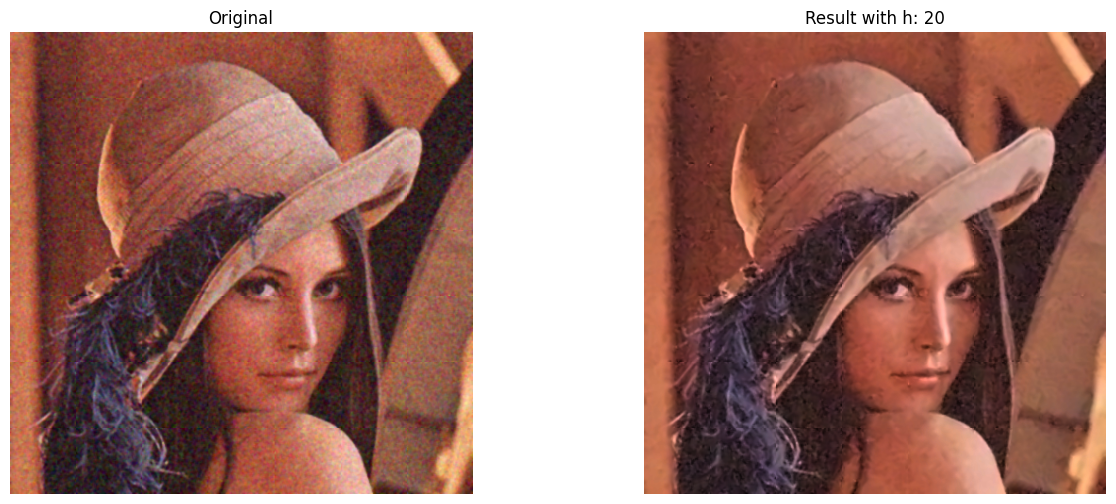

In [34]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("output/lena_bruit_pca_100_gauss_06_median_3_size_70.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR to RGB

h = 20
dst = cv2.fastNlMeansDenoisingColored(image_rgb, None, 5, 40, 7, 21)

##

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Result with h: {h}")
plt.imshow(dst)
plt.axis("off")

plt.show()


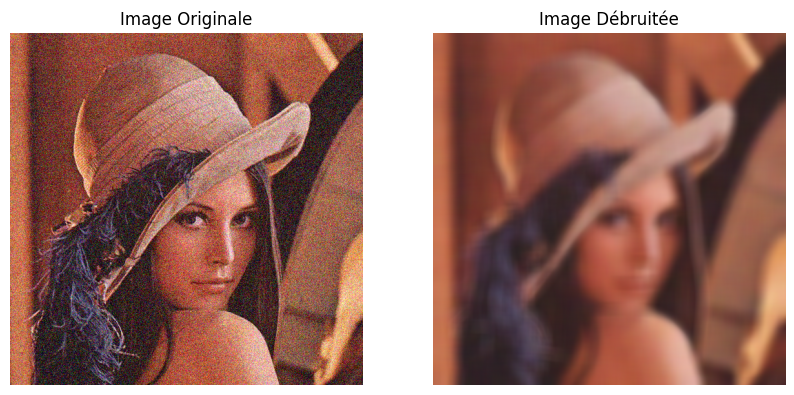

In [4]:
import numpy as np
import cv2
from skimage import img_as_float
import matplotlib.pyplot as plt

def nlm_denoise(image, patch_size=9, search_window_size=21, h=10):
    """
    Non-Local Means Denoising Algorithm
    
    Parameters:
    - image: Input noisy image (numpy array)
    - patch_size: Size of the patch (default is 3)
    - search_window_size: Size of the search window (default is 21)
    - h: Filtering parameter (default is 10)
    
    Returns:
    - Denoised image
    """
    # Convert image to float
    image = img_as_float(image)
    denoised = np.zeros_like(image)
    
    pad_size = search_window_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), 'reflect')
    
    # Define the shape for patch extraction
    patch_shape = (patch_size, patch_size, image.shape[2])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            i1 = i + pad_size
            j1 = j + pad_size
            ref_patch = padded_image[i1-pad_size:i1+pad_size+1, j1-pad_size:j1+pad_size+1, :]
            
            weights = np.zeros((search_window_size, search_window_size))
            
            for di in range(-pad_size, pad_size+1):
                for dj in range(-pad_size, pad_size+1):
                    i2 = i1 + di
                    j2 = j1 + dj
                    if (0 <= i2 < padded_image.shape[0] - pad_size) and (0 <= j2 < padded_image.shape[1] - pad_size):
                        comp_patch = padded_image[i2-pad_size:i2+pad_size+1, j2-pad_size:j2+pad_size+1, :]
                        if ref_patch.shape == comp_patch.shape:
                            dist2 = np.sum((ref_patch - comp_patch) ** 2)
                            weights[di+pad_size, dj+pad_size] = np.exp(-dist2 / (h ** 2))
            
            weights /= np.sum(weights)
            for di in range(-pad_size, pad_size+1):
                for dj in range(-pad_size, pad_size+1):
                    i2 = i1 + di
                    j2 = j1 + dj
                    if (0 <= i2 < padded_image.shape[0] - pad_size) and (0 <= j2 < padded_image.shape[1] - pad_size):
                        denoised[i, j, :] += weights[di+pad_size, dj+pad_size] * padded_image[i2, j2, :]

    return denoised


image = cv2.imread("src/lena_bruit.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

dst = nlm_denoise(image_rgb, patch_size=9, search_window_size=21, h=2)

##

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"Result")
plt.imshow(dst)
plt.axis("off")

plt.show()